# Necessary Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import the data from medical_examination.csv

In [13]:
# 1 Import the data from medical_examination.csv and assign it to the df variable.
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Add an overweight column to the data

In [15]:
# 2 Add an overweight column to the data. To determine if a person is overweight, 
# first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. 
# If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the 
# value 1 for overweight
df['overweight'] = df['weight']/(df['height']/100)**2
df['overweight'] = (df['overweight'] > 25).astype(int)

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


#  Normalize data 

In [17]:
# 3 Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1,
#  set the value to 0. If the value is more than 1, set the value to 1.
df['cholesterol'] = np.where(df['cholesterol'] > 1, 1, 0)
df['gluc'] = np.where(df['gluc'] > 1, 1, 0)

df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,1,1,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,1,1,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,0,0,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,0,0,0,0,0,0,1


# Draw the Categorical Plot

In [44]:
def draw_cat_plot():
    # 5 Create a DataFrame for the cat plot 
    # using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight
    df_cat = pd.melt(
        df,
        id_vars=['cardio'], 
        value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
    )

    # 6 Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature.
    # You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size().rename(columns={'size': 'total'})

    # 7 Convert the data into long format and create a chart that shows the value counts of the 
    # categorical features using the following method provided by the seaborn library import: sns.catplot().
    fig = sns.catplot(
        data=df_cat, 
        x='variable', 
        y='total', 
        hue='value', 
        col='cardio', 
        kind='bar', 
        height=5, 
        aspect=1
    ).fig

    # 8 Get the figure for the output and store it in the fig variable.
    # (Already handled above when assigning the `fig` attribute of the catplot result)

    # 9 Do not modify the next two lines.
    fig.savefig('catplot.png')
    plt.close(fig) 
    return fig


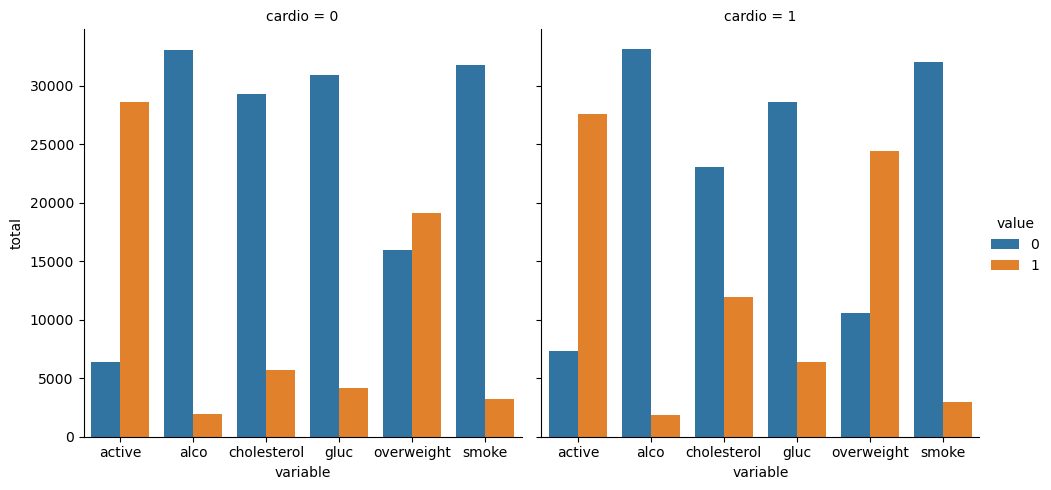

In [53]:
draw_cat_plot() # excute the function to display the plot

# 10 Draw the Heat Map in the draw_heat_map function

In [72]:
def draw_heat_map():
    # 11 Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) & 
        (df['height'] >= df['height'].quantile(0.025)) & 
        (df['height'] <= df['height'].quantile(0.975)) & 
        (df['weight'] >= df['weight'].quantile(0.025)) & 
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # 12 Calculate the correlation matrix
    corr = df_heat.corr()

    # 13 Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 14 Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 12))

    # 15 Plot the heatmap
    sns.heatmap(
        corr, 
        mask=mask, 
        cmap='coolwarm', 
        annot=True, 
        fmt='.1f', 
        square=True, 
        linewidths=.5, 
        cbar_kws={"shrink": .5}, 
        ax=ax
    )

    # 16 Do not modify the next two lines
    fig.savefig('heatmap.png')
    plt.close(fig)
    return fig

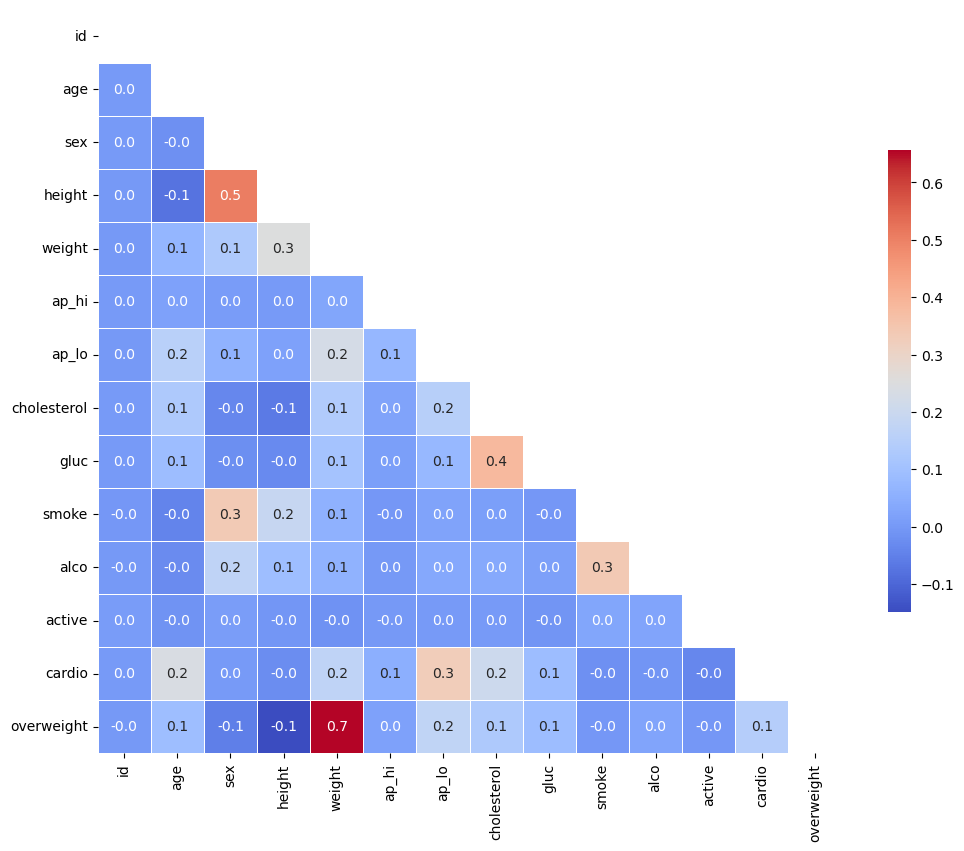

In [74]:
draw_heat_map()